# Chapter 5 Resampling Methods

## Exercise 2
### 2.a
Since the bootstrap sampling method is performed with replacement, every observation has an equal probability of being selected at each draw: $$p_{selected} = \frac{1}{n}$$.
The probability that an observation is not selected at each draw is complementary to the probability it is selected: $$p'_{selected} = 1 - p_{selected} = 1 - \frac{1}{n}$$
So, the probability that the first bootstrap observation is not the *j*th observation from the original sample is: $p' = 1 - \frac{1}{n}$

### 2.b
Similarly, since the bootstrap method is performed with replacement, the probability that the second bootstrap observation is not the *j*th observation from the original sample equals that of the first, and is: $p' = 1 - \frac{1}{n}$.

### 2.c
For the *j*th observation from the original sample to be not in the bootstrap sample, it satisfies the condition that each of the bootstrap observation must not be the *j*th observation. Suppose that the bootstrap sample size equals n, the conditional probability is: $$p' = (1 - \frac{1}{n})^n$$

### 2.d - 2.f
The probability of observation *j*th being in the bootstrap sample is complementary to the probability that it is not, and equals to: $$p = 1 - p' = 1 - (1 - \frac{1}{n})^n$$
With n = 5, 100 and 10000 respectively, the probability of *j*th observation being in the bootstrap sample is: (see below)

### 2.g
(graph: see below)
As n increases, the probability of observation *j*th being in the bootstrap sample converges to 0.6

The probability of jth observation being in the bootstrap sample as n = 5 	is 0.67232
The probability of jth observation being in the bootstrap sample as n = 100 	is 0.63397
The probability of jth observation being in the bootstrap sample as n = 10000 	is 0.63214


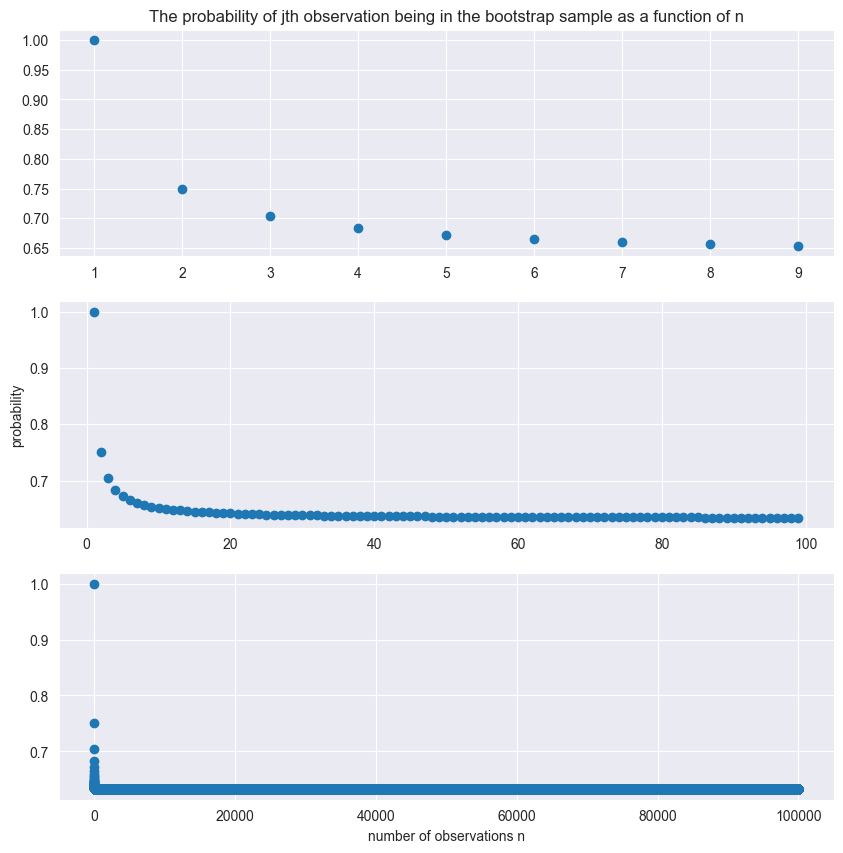

In [2]:
# 2.d - 2.g

import random
random.seed(0)
import numpy as np
import matplotlib.pyplot as plt

# 2.d - 2.f
def func_prob(n):
    return 1 - (1-1/n)**n

answer_str = 'The probability of jth observation being in the bootstrap sample as n = {0} \tis {1:.5g}'
print(answer_str.format(5, func_prob(5)))
print(answer_str.format(100, func_prob(100)))
print(answer_str.format(10000, func_prob(10000)))

# 2.g
ns = [10, 100, 100000]
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for n, ax in zip(ns, axes):
    x = np.arange(1, n, 1, dtype=int)
    y = func_prob(x)
    ax.scatter(x,y)

axes[2].set_xlabel('number of observations n')
axes[1].set_ylabel('probability')
axes[0].set_title('The probability of jth observation being in the bootstrap sample as a function of n');

In [3]:
# 2.h
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

np.float64(0.0089)

## Exercise 3

### 3.a
k-fold cross-validation is implemented as follows:
1. The set of observation is randomly divided into $k$ groups (folds) of approximately equal size
2. The first fold is treated as the validation set, the model is fit on the remaining $k-1$ folds
3. The $MSE_i$ is computed on the observations in the held-out validation fold.
4. Repeat 2 and 3 using a different fold $k$ times
5. Compute the k-fold CV estimates by averaging the $MSE_i$ values using the formula: $CV_{(k)} = \frac{1}{k}\sum_{i=1}^{k}MSE_i$

### 3.b
Compared to the validation set and the LOOCV approaches, the k-fold cross-validation has the following advantages and disadvantages:
|Compared to               | Validation set approach                                             | LOOCV                                             |
|---------------|---------------------------------------------------------------------|---------------------------------------------------|
| Advantages of k-fold CV   | More stable test error rate<br/>More data for the model to train on | Less computationally expensive (Except for linear and polynomial regression, LOOCV is computationally free because there is a short-cut formula that allows LOOCV to be run only once instead of n times) <br/>Lower variance |
| Disadvantages of k-fold CV | More computationally expensive                                      | Higher bias                                       |

## Exercise 4
Let $n$ be the number of observations.
To calculate the standard deviation of the prediction for a particular value of the predictor $X$, since the specific statistical learning method is unknown, a resampling method should be used. The bootstrap method is a notable candidate.
The procedure is as follows:
1. Generate B bootstrap datasets, each contains n observations from the original dataset.
2. For each bootstrap dataset, train the statistical learning model to obtain a new model $\hat{f}^b_i$, for $i = 1, 2, ... B$.
3. Use each of these B models to make a prediction for the specific predictor $X$. We obtain a set of B predicted values $\hat{y}^b_i$ for $i = 1, 2, ... B$.
4. Calculate the sample standard deviation of these B predicted values using the following formula: $$SE_B(\hat{f}(X)) = \sqrt{\frac{1}{B-1}\sum_{i=1}^{B}{(\hat{y}^b_i - \frac{1}{B}\sum_{j=1}^{B}{\hat{y}^b_j}})^2}$$

In [4]:
import random
random.seed(0)

from functools import partial

from IPython.display import display

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import (cross_validate,
                                     KFold,
                                     ShuffleSplit,
                                     train_test_split,)
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay)
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from ISLP import (load_data,
                  confusion_table)
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly,
                         sklearn_sm,
                         contrast)
import support_functions as sf

## Exercise 5

In [5]:
# 5.a
data_5 = load_data('default')
data_5 = pd.get_dummies(data_5, columns=['student'], drop_first=True)
X_5 = data_5[['income', 'balance']]
Y_5 = data_5['default']

logit = LogisticRegression(C=1e10, solver='liblinear')
logit_5a = logit.fit(X_5, Y_5)
labels_5a = logit.predict(X_5)
print('Train data test error rate: {}'.format(np.sum(labels_5a != Y_5)/ len(Y_5)))

Train data test error rate: 0.0336


In [6]:
data_5.columns

Index(['default', 'balance', 'income', 'student_Yes'], dtype='object')

### 5.c
The validation error rates differ for different cross-validation sets. In 5b, the error rate is 0.037. In 5c, the error rates are 0.0295, 0.03 and 0.027. The variation in the error rate for different cross-validation sets illustrates the variance in the error rate when using cross-validation as the re-sampling method.

In [7]:
# 5.b
(X_train_5b,
 X_test_5b,
 Y_train_5b,
 Y_test_5b) = train_test_split(X_5,
                            Y_5,
                            test_size=0.2,
                            random_state=0)
logit = LogisticRegression(C=1e10, solver='liblinear')
logit_5b = logit.fit(X_train_5b, Y_train_5b)
probs_5b = logit_5b.predict_proba(X_test_5b)
# the label is the class with the highest probability
labels_5b = np.array([logit_5b.classes_[i] for i in np.argmax(probs_5b, axis=1)])
np.all(labels_5b == logit_5b.predict(X_test_5b)) # test if the label from predict_proba() agrees with predict()
cv_error_5b = np.sum(labels_5b != Y_test_5b)/ len(Y_test_5b)
con_tab_5b = confusion_table(labels_5b, Y_test_5b)
print('Random state: {0}. Validation set error rate: {1}'.format(0, cv_error_5b))
# display(con_tab_5b)

Random state: 0. Validation set error rate: 0.037


In [8]:
# 5.c
rnds = (1, 3, 9)
cv_errors_5c = []
con_tabs_5c = []

for rnd in rnds:
    (X_train_i,
     X_test_i,
     Y_train_i,
     Y_test_i) = train_test_split(X_5,
                                Y_5,
                                test_size=0.2,
                                random_state=rnd)
    logit = LogisticRegression(C=1e10, solver='liblinear')
    logit_i = logit.fit(X_train_i, Y_train_i)
    labels_i = logit_i.predict(X_test_i)
    cv_error_i = np.sum(labels_i != Y_test_i)/ len(Y_test_i)
    cv_errors_5c.append(cv_error_i)
    con_tab_i = confusion_table(labels_i, Y_test_i)
    con_tabs_5c.append(con_tab_i)
    print('Random state: {0}. Validation set error rate: {1}'.format(rnd, cv_error_i))
    # display(con_tab_i)

Random state: 1. Validation set error rate: 0.0295
Random state: 3. Validation set error rate: 0.03
Random state: 9. Validation set error rate: 0.027


### 5.d
Including the dummy variable for *student* doesn't lead to any change in the test error rate.

In [9]:
# 5.d
rnds = (0, 1, 3, 9)
cv_errors_5d = []
con_tabs_5d = []

for rnd in rnds:
    (X_train_i,
     X_test_i,
     Y_train_i,
     Y_test_i) = train_test_split(data_5[['income', 'balance', 'student_Yes']],
                                Y_5,
                                test_size=0.2,
                                random_state=rnd)
    logit = LogisticRegression(C=1e10, solver='liblinear')
    logit_i = logit.fit(X_train_i, Y_train_i)
    labels_i = logit_i.predict(X_test_i)
    cv_error_i = np.sum(labels_i != Y_test_i)/ len(Y_test_i)
    cv_errors_5d.append(cv_error_i)
    con_tab_i = confusion_table(labels_i, Y_test_i)
    con_tabs_5d.append(con_tab_i)
    print('Random state: {0}. Validation set error rate: {1}'.format(rnd, cv_error_i))
    # display(con_tab_i)

error_table = pd.DataFrame({'random state': rnds,
                            'error rate without student': [cv_error_5b, *cv_errors_5c],
                            'error rate with student': [*cv_errors_5d],})
display(error_table)


Random state: 0. Validation set error rate: 0.037
Random state: 1. Validation set error rate: 0.0295
Random state: 3. Validation set error rate: 0.03
Random state: 9. Validation set error rate: 0.027


,random state,error rate without student,error rate with student
0,0,0.0370,0.0370
1,1,0.0295,0.0295
2,3,0.0300,0.0300
3,9,0.0270,0.0270


## Exercise 6
### 6.a - 6.d
The standard errors resulting from using the **sm.GLM** function approximately equals the standard error obtained from performing 1000 bootstrap resampling (boostrap sample size equals the size of the observation).
* For predictor *income*, the standard error from sm.GLM and bootstrap is 4e-6.
* For predictor *balance*, the standard error from sm.GLM and bootstrap is 7e-5.

In [10]:
# 6.a
data_6 = data_5.copy()
data_6['default'] = data_6['default'] == 'Yes'

Y_6 = data_5['default'] == 'Yes'
model_6 = sm.GLM(Y_6,
             data_5[['income', 'balance']],
             family=sm.families.Binomial())
model_6_results = model_6.fit()
display(summarize(model_6_results)['std err'])
# display(model_6_results.summary())

income     0.000004
balance    0.000070
Name: std err, dtype: float64

In [11]:
# 6.b - 6.c
def boot_fn(predictors,
            response,
            data,
            idx):
    model = sm.GLM(data.loc[idx, response],
                   data.loc[idx, predictors],
                   family=sm.families.Binomial())
    return model.fit().params

def boot_SE(data,
            predictors,
            response,
            func=boot_fn,
            n=None,
            B=1000,
            seed=0):
    rng = np.random.default_rng(seed=seed)
    SE = []
    n = n or data.shape[0]
    for _ in range(B):
        idx = rng.choice(data.index,
                         n,
                         replace=True)
        se = func(predictors, response, data, idx)
        SE.append(se)
    SE = pd.DataFrame(SE)
    return SE

coef = boot_SE(data_6, ['income', 'balance'], 'default')
SE_boot = coef.std()
SE_boot

income     0.000004
balance    0.000070
dtype: float64

In [12]:
# se_gml = summarize(model_6_results)['std err']
# se_boot = SE.std()
#
# fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#
# for ax, pred in zip(axes, ['income', 'balance']):
#     # ax.hist(SE[pred])
#     ax.axvline(x=se_gml[pred], color='red', label='sm.GML')
#     ax.axvline(x=se_boot[pred], color='green' , label='Bootstrap mean')
#     ax.set_xlim(-1,1)
#     ax.set_title('Standard error of coefficient estimate of {}'.format(pred))
#     ax.legend()
#     ax.tick_params(axis='x', labelrotation=45)

## Exercise 7
### 7.e
In (a), the model trained on all observations incorrectly predicts 503 training observations, having a training error rate of 0.462. In (d), the models in the LOOCV incorrectly labels 506 observations, having a test error rate of 0.465. Given that the model in (a) and the models in (d) are trained on highly overlapping data, and the data the models use to make prediction also highly overlap, it is not surprising that their error rate are similar.

In [13]:
data_7 = load_data('weekly')

X_7 = data_7[['Lag{}'.format(i) for i in range(1, 3)]]
Y_7 = data_7['Direction'] == 'Up'

## 7.a
# use sm.GML method to fit logistic regression model
model_7_a = sm.GLM(Y_7,
                   X_7,
                   family=sm.families.Binomial())
model_7_a_results = model_7_a.fit()
probs_7a = model_7_a_results.predict(X_7)
labels_7a = ['Up' if prob > 0.5 else 'Down' for prob in probs_7a]
error_count_7a = np.sum(labels_7a != data_7['Direction'])
print('Total incorrect predictions: {}'.format(error_count_7a))
print('Test error rate: {}'.format(error_count_7a / data_7.shape[0]))

Total incorrect predictions: 503
Test error rate: 0.46189164370982555


In [14]:
## 7.b - 7.c
idx = data_7.index[1:]
# use sm.GML method to fit logistic regression model
model_7_b = sm.GLM(Y_7.iloc[idx],
                   X_7.iloc[idx],
                   family=sm.families.Binomial())
model_7_b_results = model_7_b.fit()
probs_7b = model_7_b_results.predict(X_7.iloc[0]).iloc[0]
label_7b = 'Up' if probs_7b > 0.5 else 'Down'
print('Model prediction: {0}\nTrue label: {1}'.format(label_7b, data_7.loc[0, 'Direction']))

Model prediction: Up
True label: Down


In [15]:
# 7.d - 7.e
error_count = 0
for i in range(data_7.shape[0]):
    idx = data_7.index.drop(i)
    model = sm.GLM(Y_7.iloc[idx],
                   X_7.iloc[idx],
                   family=sm.families.Binomial())
    model_result = model.fit()
    prob = model_result.predict(X_7.iloc[i]).iloc[0]
    label = 'Up' if prob > 0.5 else 'Down'
    error_count += int(label != data_7.loc[i, 'Direction'])
print('Total incorrect predictions: {}'.format(error_count))
print('Test error rate: {}'.format(error_count / data_7.shape[0]))

Total incorrect predictions: 506
Test error rate: 0.46464646464646464


## Exercise 8
### 8.a
In the dataset:
* $n = 100$
* $p=2$, including $x^2$ and $x$.

### 8.b
The scatter plot displays a distinct quadratic relationship between *x* and *y*. The pattern is an inverted parabola (concave down), which is consistent with the negative coefficient of the quadratic term $(-2x^2)$. Despite the Gaussian noise, the signal is still strong, with the parabola showing signs in accordance with the relationship $y = x - 2 \times x^2$:
* The peak of the parabola is approximately at $x = 0.25$
* The parabola intersects with line $y = 0$ at approximately $x = 0$ and $x = 0.5$

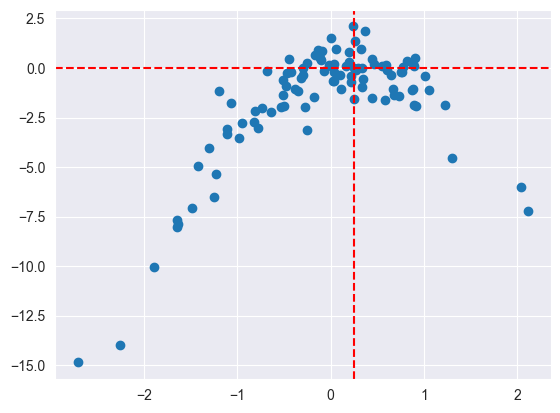

In [16]:
## 8.a
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

## 8.b
plt.scatter(x, y)
plt.axhline(0, color='r', linestyle='--')
plt.axvline(0.25, color='r', linestyle='--');

### 8.d
Using a different random seed doesn't change the average of the squared errors between the models in (c) and (d). This is because there is no element of randomness in LOOCV. So, even with different seed, the models are trained and evaluated on the same datasets, leading to the same predictions.

### 8.e
The average squared errors from LOOCV suggest that the quadratic model has the lowest average error (1.100), closely follow by the cubic model (1.279) and quartic model (1.323). The linear model has significantly higher error (8.869). The model having the lowest error rate is the quadractic model, $$Y = \beta_0 + \beta_1X +\beta_2X^2 + \epsilon$$. This result is as expected, as the quadratic model has almost all the significant terms in the true relationship between *y* and *x* in the data generation process $y = x - 2 \times x^2$.

### 8.f
The statistical significance of the coefficient estimates largely agrees with the conclusion drawn based on the cross-validation results. In particular,
* LOOCV is used to estimate the Test MSE (mean squared error) (i.e. the square of the difference between a model's prediction and the true value of the response). The average squared errors from LOOCV show that the quadratic model has the lowest average error (1.123), closely follow by the cubic model (1.302) and quartic model (1.332). The linear model has significantly higher error (6.633). The results suggest that among the models, the quadratic model best learns and represents the relationship between *y* and *x*, closely followed by the cubic and quartic. The linear model is the worst.
* The statistical significance of the coefficient estimates (t-statistic $t$ and its probability $P>|t|$) of the different models don't directly indicate their performance compared to each other. Rather, they either reject or support the null hypothesis: $H_0: \beta_i = 0$. In particular:
    * In the quadratic, cubic and quartic models, the $t$ statistic values of $X$ and $X^2$ are consistently higher than 0, and their $P>|t|$ values are very low - virtually 0. These signs strongly reject the null hypothesis that $\beta_1 = 0$, $\beta_2 = 0$. In other words, $X$ and $X^2$ should be in the model. This aligns with the cross-validation result, where moving from the linear to the quadratic model, the error significantly reduces from 6.633 to 1.123.
    * The $t$ statistic values of the *intercept* (in all models, except the linear model), and $X^3$ (in the cubic and quartic models) are very close to 0, while their $P>|t|$ values are very high - much larger than the threshold 0.05. These signs strongly support the null hypothesis that $\beta_0 = 0$ and $\beta_3 = 0$. In other words, these terms don't have any statistical significance in predicting *y*. Indeed, the cross-validation shows that moving from the quadratic to the cubic model, the error slightly increases from 1.123 to 1.302.
    * For the quartic model, the $t$ statistic value of the coefficient $\beta_4$ is significantly higher than 0, and the $P>|t|$ is 0.023 < 0.05, rejecting the null-hypothesis that $\beta_4 = 0$. This indicates that the model perceives that the term $X^4$ has some significance. The result of the cross-validation rejects the significance assumption, as the error increases from 1.302 to 1.332 when moving from the cubic to the quartic model. Given that the increase in error from the cubic to quartic model (0.031) is much less than that moving from the quadratic to cubic model (0.179), the cross validation shows that the quartic model overfits the training data by trying to fit the data to the quartic shape.

In [17]:
## 8.c
data_8 = np.array([np.ones(100), x, *[np.pow(x, i) for i in range(2,5)]])
data_8 = pd.DataFrame(data_8.T, columns=['intercept', 'X', *['X^{}'.format(i) for i in range(2,5)]])
data_8['Y'] = y

def loocv_least_squares(data, X, Y, seed=0):
    """
    :param data: pd.DataFrame contain predictors and response
    :param X: list(str) predictors
    :param Y: str response
    :param seed: int seed for random number generator
    :return: float Mean Squared Error of LOOCV models
    """
    random.seed(seed)
    squared_error = 0
    for i in range(data.shape[0]):
        idx = data.index.drop(i)
        model = sm.OLS(data.loc[idx, Y],
                       data.loc[idx, X])
        model_result = model.fit()
        pred = model_result.predict(data.loc[i, X])
        squared_error += ((pred - data.loc[i, Y]) ** 2).values
    return squared_error/data.shape[0]

MSE_8c = []
for i in range(2, 6):
    MSE_8c.append(loocv_least_squares(data_8, data_8.columns[0:i], 'Y'))

MSE_8c

[array([6.63302984]),
 array([1.12293686]),
 array([1.30179655]),
 array([1.33239427])]

In [18]:
## 8.d
MSE_8d = []
seed = 100
for i in range(2, 6):
    MSE_8d.append(loocv_least_squares(data_8, data_8.columns[0:i], 'Y', seed=seed))
MSE_8d

[array([6.63302984]),
 array([1.12293686]),
 array([1.30179655]),
 array([1.33239427])]

In [19]:
# 8.f
seed = 0
random.seed(0)
models_8f_stats =[]
for i in range(2, 6):
    predictors = data_8.columns[0:i]
    model = sm.OLS(data_8.loc[:, 'Y'], data_8.loc[:, predictors])
    model_result = model.fit()
    models_8f_stats.append(summarize(model_result))

models_8f_stats

[             coef  std err      t  P>|t|
 intercept -1.4650    0.247 -5.937    0.0
 X          1.9494    0.289  6.752    0.0,
              coef  std err       t  P>|t|
 intercept -0.0728    0.119  -0.611  0.543
 X          0.9663    0.126   7.647  0.000
 X^2       -2.0047    0.091 -22.072  0.000,
              coef  std err       t  P>|t|
 intercept -0.0572    0.120  -0.477  0.635
 X          1.1146    0.187   5.945  0.000
 X^2       -2.0471    0.099 -20.673  0.000
 X^3       -0.0643    0.060  -1.070  0.287,
              coef  std err       t  P>|t|
 intercept  0.1008    0.136   0.743  0.460
 X          0.9050    0.205   4.423  0.000
 X^2       -2.5059    0.221 -11.336  0.000
 X^3        0.0338    0.073   0.466  0.642
 X^4        0.1042    0.045   2.309  0.023]

## Exercise 9
### 9.a
The estimated population mean of *medv* is $\hat{\mu} = 22.533$.
### 9.b
The estimated standard error of the estimated population mean of *medv* is $SE(\hat{\mu}) = 0.409$. The $SE(\hat{\mu}) = 0.409$ represents the average amount that the sample mean $\hat{\mu}$ is expected to deviate from the true population mean $\mu$ due to random sampling variability.

In [80]:
## 9.a - 9b
data_9 = load_data('Boston')

muy_medv = data_9.loc[:, 'medv'].mean()
se_medv = data_9.loc[:, 'medv'].std() / np.sqrt(data_9.loc[:, 'medv'].shape[0])
print('the estimated population mean of medv: {:.3f}'.format(muy_medv))
print('the estimated standard error of the estimated population mean of medv: {:.3f}'.format(se_medv))

the estimated population mean of medv: 22.533
the estimated standard error of the estimated population mean of medv: 0.409


In [69]:
data_9.shape

(506, 13)

### 9.c
The steps to measure the standard error of the mean $\hat{\mu}$ of *medv* are as follows:
1. Generate $B=1000$ boostrap samples, each contains $n=506$ observations from the data.
2. For each bootstrap sample, compute the $\hat{\mu_i}$ of *medv*
3. Compute the standard error of the mean $\hat{\mu}$ of *medv* using the formula: $$SE(\hat{\mu}) = \sqrt{\frac{1}{B-1}\sum_{i=1}^{B}{(\hat{\mu_i} - \frac{1}{B}\sum_{j=1}^{B}{\hat{\mu_j}})^2}}$$
Given the numpy.random seed is 0, the estimated standard error of the estimated population mean $\hat{\mu}$ of *medv* using bootstrap is 0.413, which is very close to the estimated standard error obtained in (b). differing by less than 1%.

In [116]:
## 9.c
def boot_mean_se(data, n=None, B=1000, seed=0, func=np.mean, **kwargs):
    """
    :param data: pd.Series
    :param n: int bootstrap sample size
    :param B: int number of bootstrap samples
    :param seed: int seed for random number generator
    :param func: function that takes the sample as input and returns a value (e.g. mean, median, percentile, etc.)
    :param kwargs: keyword arguments to pass to func
    :return: tuple(float, float) average of the mean, standard error of the estimated mean
    """
    rng = np.random.default_rng(seed)
    n = n or data.shape[0]
    means = np.empty(B)
    for i in range(B):
        idx = rng.choice(data.index,
                         n,
                         replace=True)
        sample = data.iloc[idx]
        means[i] = func(sample, **kwargs)
    mean_bar = np.mean(means)
    se_m = np.sqrt(np.sum(np.square(means - mean_bar)) / (B-1))
    return mean_bar, se_m

mean_bar, se_mean = boot_mean_se(data_9['medv'], seed=0)

print('the average of the estimated population mean of medv using bootstrap: {:.3f}'.format(mean_bar))
print('the estimated standard error of the estimated population mean of medv using bootstrap: {:.3f}'.format(se_mean))

the average of the estimated population mean of medv using bootstrap: 22.549
the estimated standard error of the estimated population mean of medv using bootstrap: 0.413


### 9.d
* Analytical 95% confidence interval: \[21.715,23.351]
* Bootstrap 95% confidence interval: \[21.724,23.375]

Given the difference between the 2 estimations of the standard errors are insignificant, the 95% confidence interval of the estimated population mean of *medv* highly overlap. Given the stochastic nature of the bootstrap method, the estimated population mean and standard error of the estimated population mean will vary as the numpy.random seed value varies.

95% confidence interval for the mean of medv using bootstrap: [21.724,23.375]
95% confidence interval for the mean of medv calculated directly: [21.715,23.351]


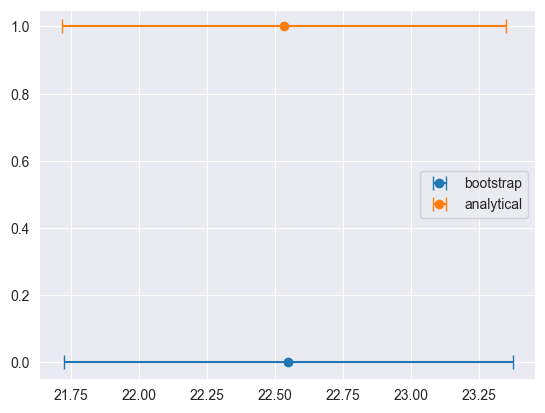

In [68]:
## 9.d
print('95% confidence interval for the mean of medv using bootstrap: [{:.3f},{:.3f}]'.format(mean_bar - 2*se_mean, mean_bar + 2*se_mean))
print('95% confidence interval for the mean of medv calculated directly: [{:.3f},{:.3f}]'.format(muy_medv - 2*se_medv, muy_medv + 2*se_medv))

plt.errorbar(mean_bar, 0, xerr=2*se_mean, fmt='o', capsize=5, label='bootstrap')
plt.errorbar(muy_medv, 1, xerr=2*se_medv, fmt='o', capsize=5, label='analytical')
plt.legend();

### 9.e
The estimated median value of *medv* in the population is: $\hat{\mu}_{med} = 21.200$.
### 9.f
Using bootstrap with $B=1000$, with each sample has $n=506$ observations, and numpy random seed = 0, the estimated standard error of the estimated median of *medv* in the population is $SE(\hat{\mu}_{med}) = 0.370$. This is the average amount that the estimated median value of the *medv* deviates from the true population median of *medv*.

Using the two standard error rule, the 95% confidence interval of the estimated median is: \[20.446, 21.925]

In [117]:
## 9.e
med_medv = data_9.loc[:, 'medv'].median()

### 9.f
median_bar, se_median = boot_mean_se(data_9['medv'], seed=0, func=np.median)
print('the analytical estimated population median of medv: {:.3f}'.format(med_medv))
print('the average of the estimated population median of medv using bootstrap: {:.3f}'.format(median_bar))
print('the estimated standard error of the estimated population median of medv using bootstrap: {:.3f}'.format(se_median))
print('95% confidence interval for the median of medv using bootstrap: [{:.3f},{:.3f}]'.format(median_bar - 2*se_median, median_bar + 2*se_median))

the analytical estimated population median of medv: 21.200
the average of the estimated population median of medv using bootstrap: 21.186
the estimated standard error of the estimated population median of medv using bootstrap: 0.370
95% confidence interval for the median of medv using bootstrap: [20.446,21.925]


### 9.g
The estimated tenth percentile value of *medv* in the population is: $\hat{\mu}_{0.1} = 12.750$.
### 9.h
Using bootstrap with $B=1000$, with each sample has $n=506$ observations, and numpy random seed = 0, the estimated standard error of the estimated tenth percentile value of *medv* in the population is $SE(\hat{\mu}_{0.1}) = 0.540$. This is the average amount that the estimated tenth percentile value of the *medv* deviates from the true population tenth percentile value of *medv*.

Using the two standard error rule, the 95% confidence interval of the estimated tenth percentile value is: \[11.751, 13.766]

In [120]:
## 9.g
tenth_medv = data_9.loc[:, 'medv'].quantile(0.1)

## 9.h
tenth_bar, se_tenth = boot_mean_se(data_9['medv'], seed=0, func=np.percentile, q=10)
print('the analytical estimated population tenth percentile value of medv: {:.3f}'.format(tenth_medv))
print('the average of the estimated population tenth percentile value of medv using bootstrap: {:.3f}'.format(tenth_bar))
print('the estimated standard error of the estimated population tenth percentile value of medv using bootstrap: {:.3f}'.format(se_tenth))
print('95% confidence interval for the tenth percentile value of medv using bootstrap: [{:.3f},{:.3f}]'.format(tenth_bar - 2*se_tenth, tenth_bar + 2*se_tenth))

the analytical estimated population tenth percentile value of medv: 12.750
the average of the estimated population tenth percentile value of medv using bootstrap: 12.759
the estimated standard error of the estimated population tenth percentile value of medv using bootstrap: 0.504
95% confidence interval for the tenth percentile value of medv using bootstrap: [11.751,13.766]
